Baseball Case Study
Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number 
of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features 
that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

So,we are going to predict the Number of predicted wins (W) below


the pitcher throws ball in strike zone.the hitter should swing bat correctly to hit within the zone.there should not be foul out.the base on balls and strike out zone will reduce the scores according to their position and participation in play as per  the game rules.1 run will be awarded if hitter goes to all plates and come back to his position.pitcher and his team has many strategies to make pop out or call out the hitter.there are 9 people in each group and divided into two groups.when hitter is in some othe base the next hitter comes to take the possession.the pitcher can us eearned runs to make pop out the hitter.the team who gets more scores in their tutns are the winner of the game.

In [1]:
#import all libaries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"



In [2]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Baseball Case Study.csv",sep='\t')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Runs    ------->R  times reached home plate legally and safely

Wins ------>W      Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the                      starter needs to pitch at least 5 innings of work (also related: winning percentage)

At Bats ------>AB     plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or                               obstruction

Hits    ----->H      reaching base because of a batted, fair ball without error by the defense

Doubles  ------>2B    hits on which the batter reaches second base safely without the contribution of a fielding error

Triples   ------>3B   hits on which the batter reaches third base safely without the contribution of a fielding error

Homeruns  ----->HR    at bats divided by home runs

Walks    ------->BB    (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded                             first base.

Strikeouts  ------->SO    number of times a batter strikes out to their plate appearance

Stolen Bases ------>SB    number of bases advanced by the runner while the ball is in the possession of the defense

Runs Allowed ------>RA    number of runs allowed times nine divided by innings pitched

Earned Runs ------->ER     number of runs that did not occur as a result of errors or passed balls

Earned Run Average (ERA)------->ERA    total number of earned runs (see "ER" above), multiplied by 9, divided by innings                                                 pitched

Shutouts------->CG          number of games where player was the only pitcher for their team

Saves------>SHO        number of complete games pitched with no runs allowed

Complete Games------->SV    number of games where the pitcher enters a game led by the pitcher's team, finishes the game without                              surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer                            when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c                          the pitcher pitched three or more innings

Errors------->E     number of times a fielder fails to make a play he should have made with common effort, and the offense                           benefits as a result

Here all the data columns are having categorical(ordinal)data type.Hence it is a Regression Problem.We are going to find the Target variable 'The no of Wins"(W)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.shape

(30, 17)

EDA:

In [6]:
#checks nulls values of columns if present any
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

(-1.1000000056797654,
 1.102008628558009,
 -1.1000913093199631,
 1.1019173249178114)

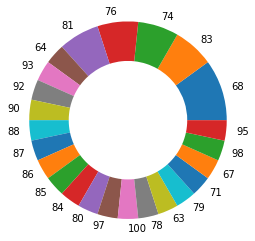

In [9]:
# value counts of W column
sorted_counts=df['W'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

here score counts of Wins are equally distributed except the scores 76,74,83,68  are more in numbers than others

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

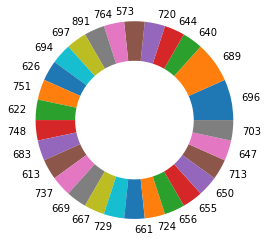

In [10]:
sorted_counts=df['R'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the scores of Runs are mostly equal in counts but the scores 689,696 are more in numbers than others

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

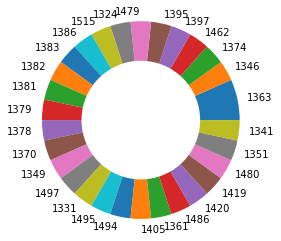

In [11]:
sorted_counts=df['H'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the score counts of Hits(the player went to base)are mostly equal in numbers but the score 1363 has more counts than other scores of Hits

(-1.1000000108353885,
 1.102008623402386,
 -1.1000913093199631,
 1.1019173249178114)

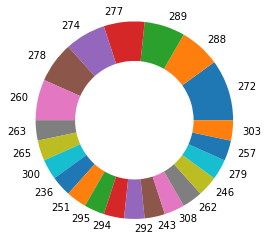

In [12]:
sorted_counts=df['2B'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the scores of Doubles (player reaches to 2 base safely) 272 is more in numbers that means team scored this most number of times

(-1.1000000056797654,
 1.102008628558009,
 -1.1000913093199631,
 1.1019173249178114)

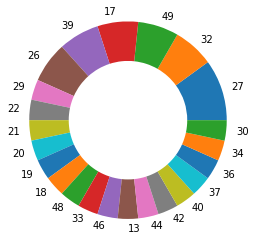

In [13]:
sorted_counts=df['3B'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the scores of triples(player went to 3base).the scores 32,27,49 are scores mostly scored when they reaching 3base

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

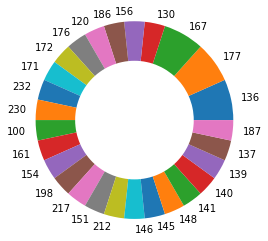

In [14]:
sorted_counts=df['HR'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

Home runs achieved by player when in free style and not foul out.And team scored 167,177,136 mostly when getting home runs

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

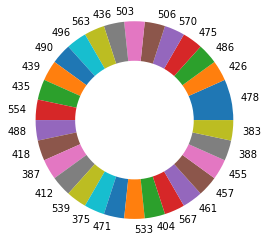

In [15]:
sorted_counts=df['BB'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

most of the base on balls happened and its score distribution are almost same only

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

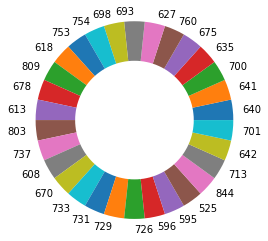

In [16]:
sorted_counts=df['RA'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the run allowed are almost same everytime

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

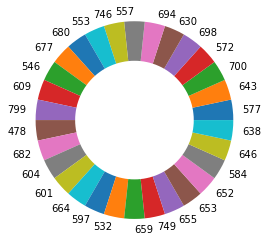

In [17]:
sorted_counts=df['ER'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

ER are almost same everytime and the ER should be less in value for the pitcher otherwise he might allow more runs to hitter in general terms

(-1.100000006578719,
 1.100000012299318,
 -1.1000000091529918,
 1.1000000097250453)

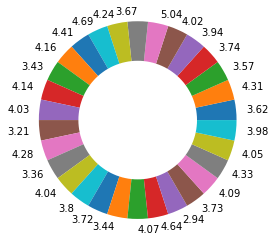

In [18]:
sorted_counts=df['ERA'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

ERA is almost equal in scores and it is also equal to ER.it has equal in scores everytime

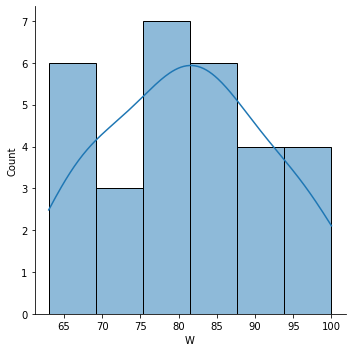

In [19]:
sns.displot(df["W"],kde=True)

distribution of wins is almost normal

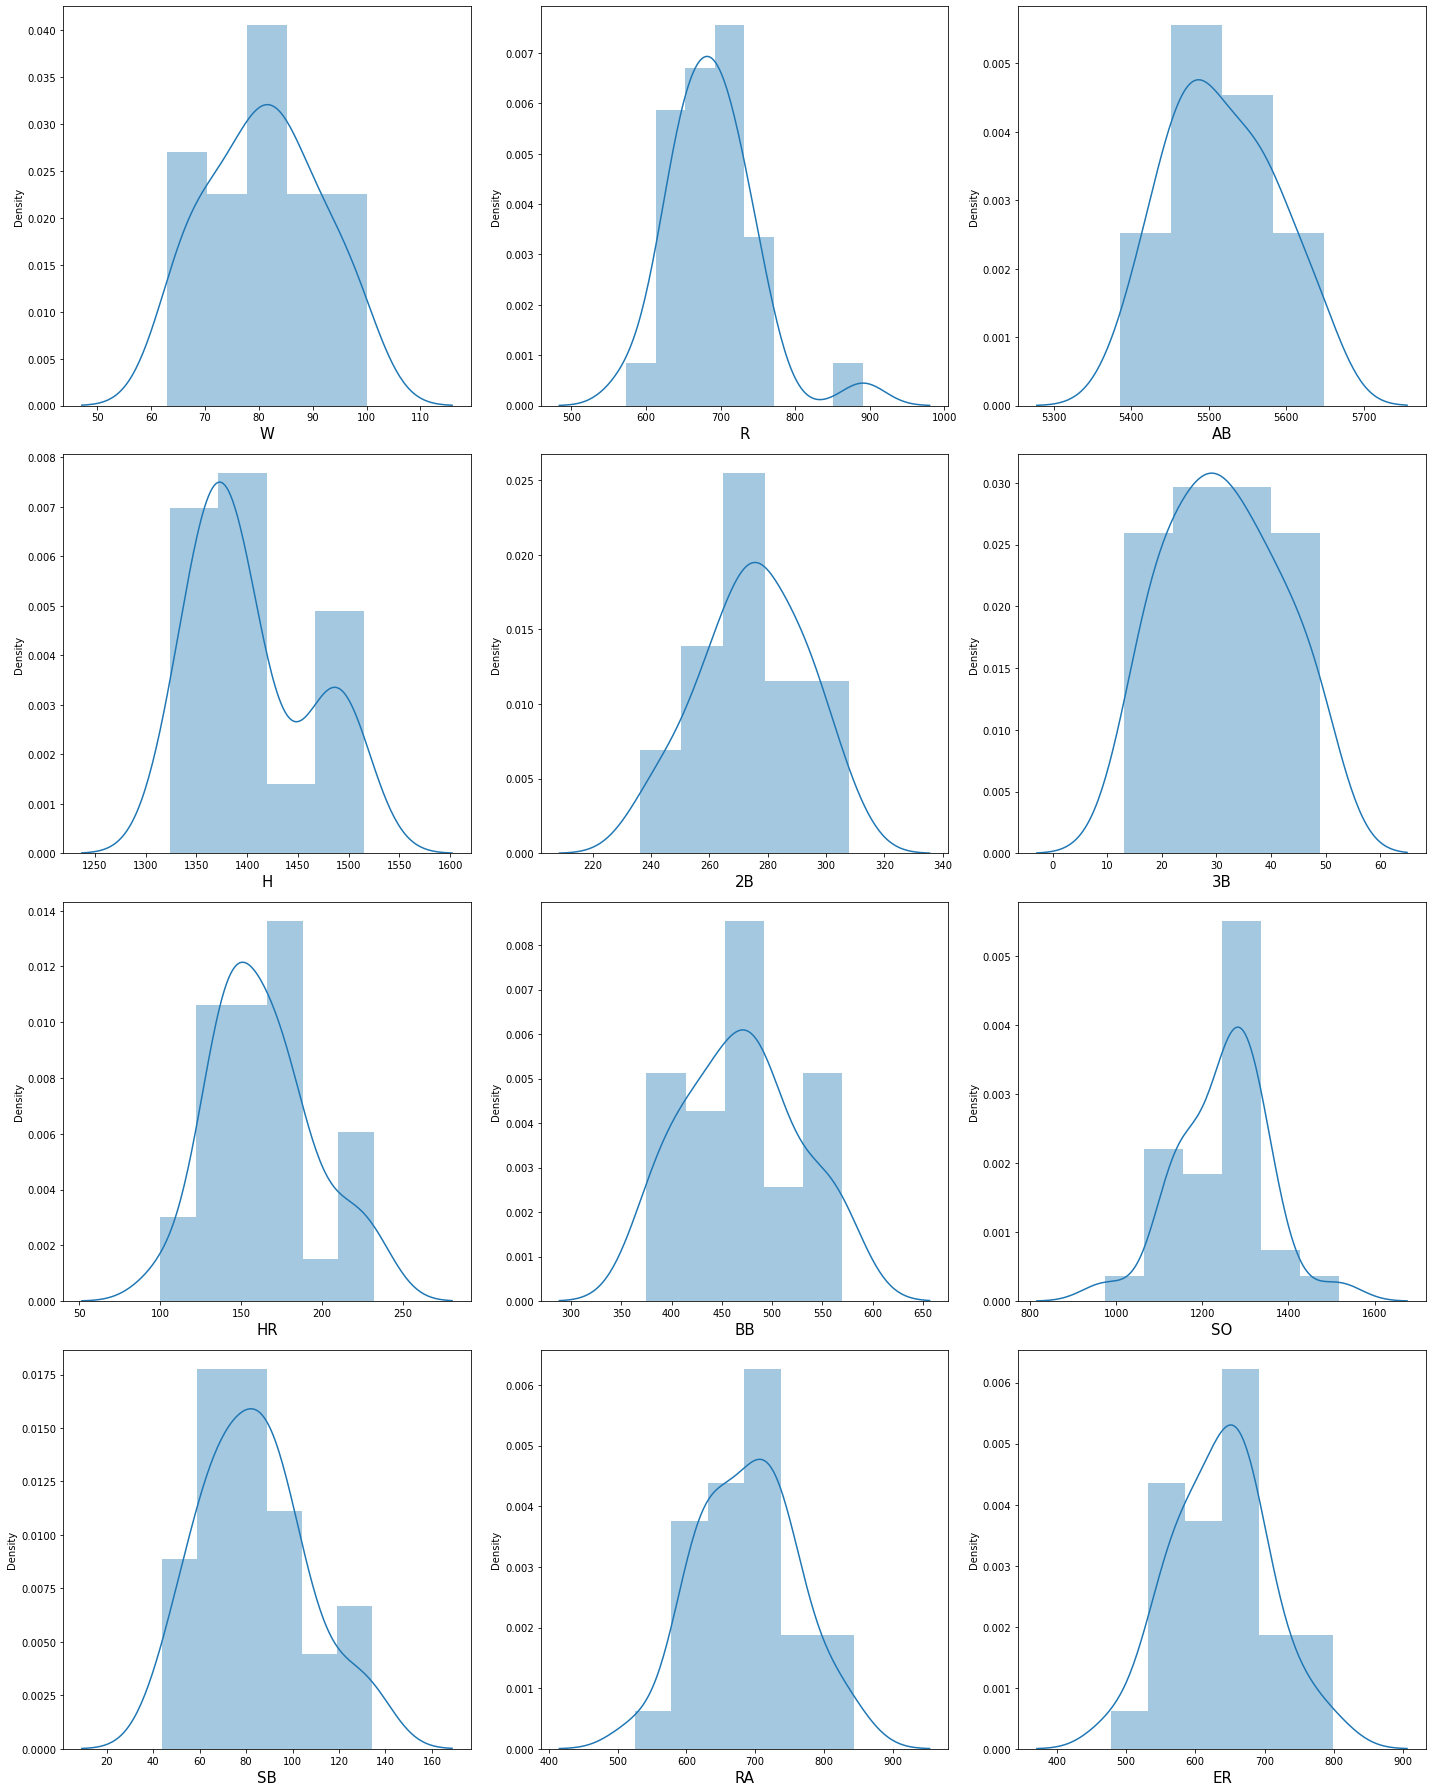

In [20]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

these are the distributions of all the scores.the runs and strike out has littl skewness

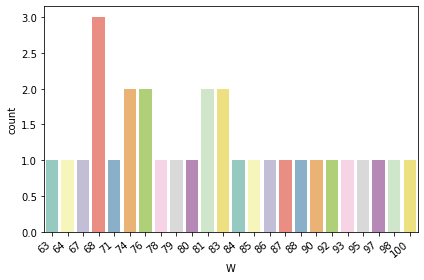

In [21]:
ax = sns.countplot(x="W", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

the wins is high in number when the scores are 68,75,77,81,83 in these ranges

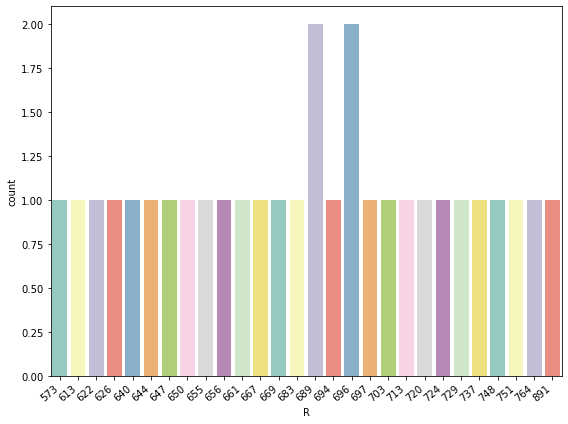

In [22]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="R", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

the count of runs are high in numbers when the scores ar 689,696

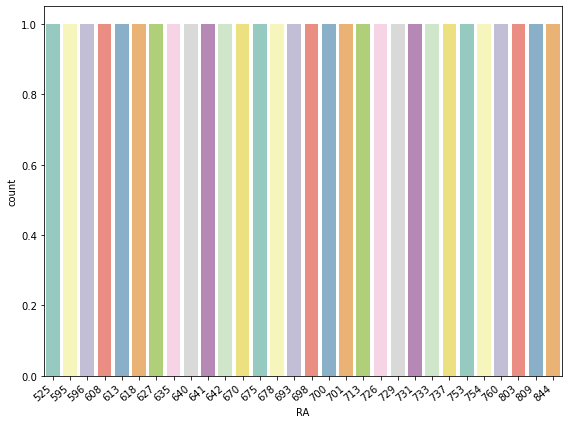

In [23]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="RA", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

all counts of scores are equal in numbers

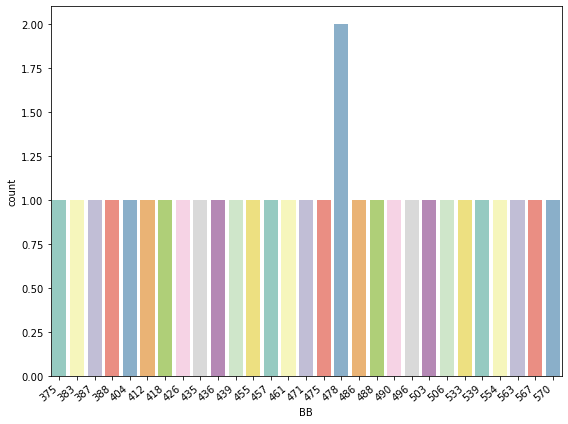

In [24]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="BB", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

the base on balls(balls pitched four times wrongly makes the batter to move to 2Base).the scores made , 478 are high in numbers 

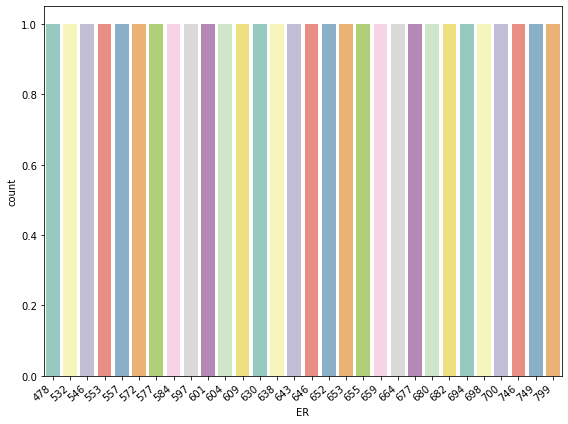

In [25]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="ER", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

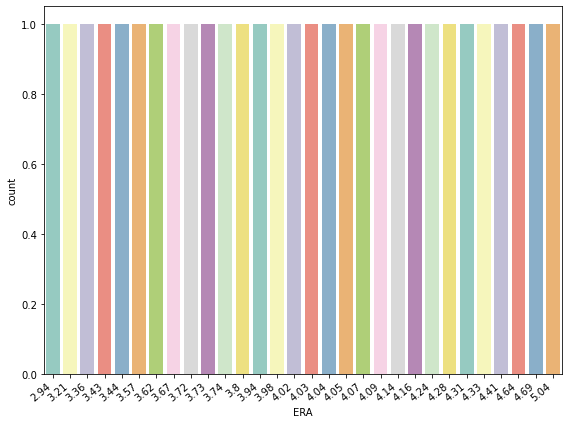

In [26]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="ERA", data=df,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

all are equal

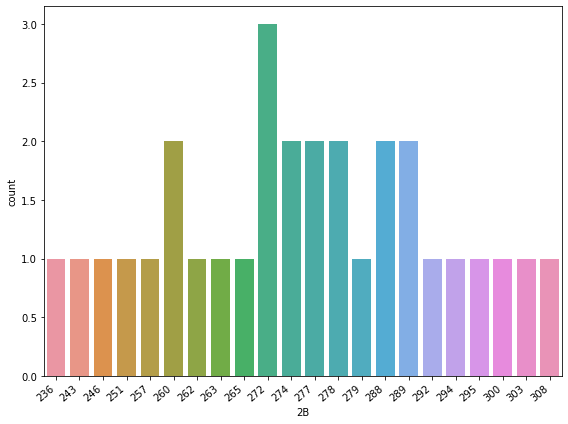

In [27]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="2B", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

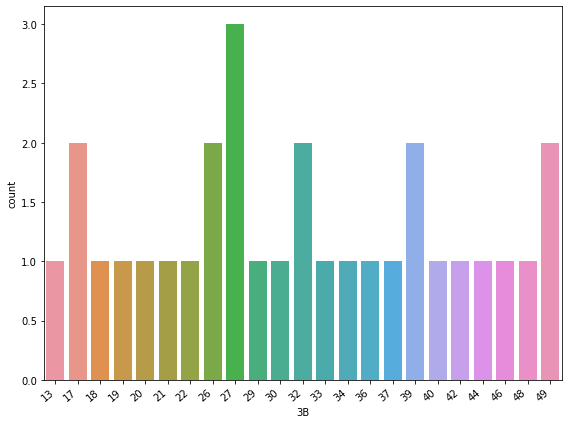

In [28]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="3B", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

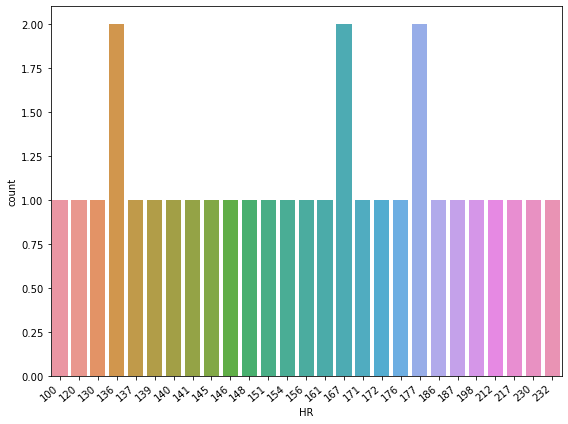

In [29]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x="HR", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

like wise we can observe the count of the scores has made in overall from the above graphs

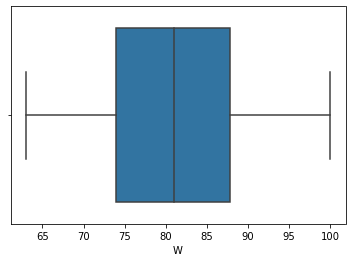

In [30]:
ax = sns.boxplot(x=df["W"])

no of wins average is around 82

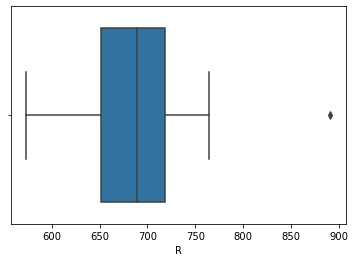

In [31]:
ax = sns.boxplot(x=df["R"])

runs average is around  680

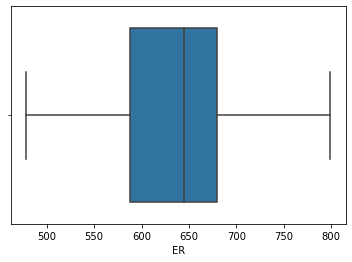

In [32]:
ax = sns.boxplot(x=df["ER"])

ER average is around 640

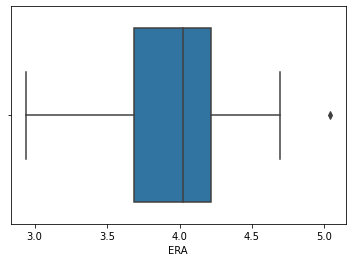

In [33]:
ax = sns.boxplot(x=df["ERA"])

ERA is the average computed by ER  is by  dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine

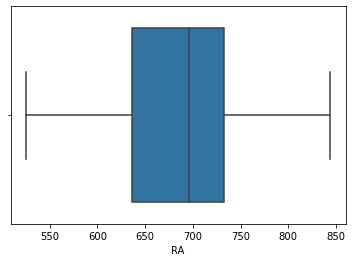

In [34]:
ax = sns.boxplot(x=df["RA"])

Text(0, 0.5, 'Wins')

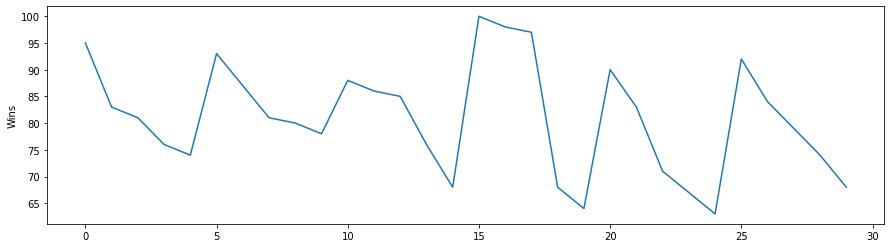

In [35]:
df.W.plot(figsize=(15,4))
plt.ylabel('Wins')

the ups and downs of wins scores

Text(0, 0.5, 'Runs')

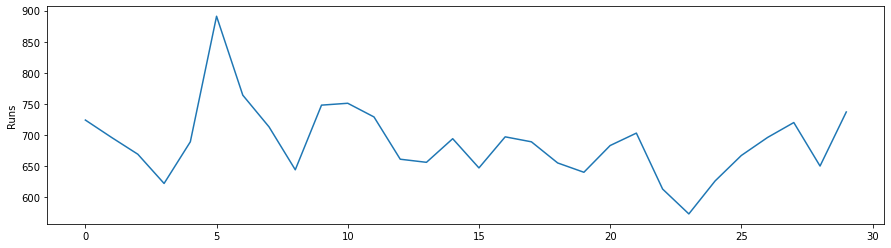

In [36]:
df.R.plot(figsize=(15,4))
plt.ylabel('Runs')

the runs scores 

Text(0, 0.5, 'Earned Run Average')

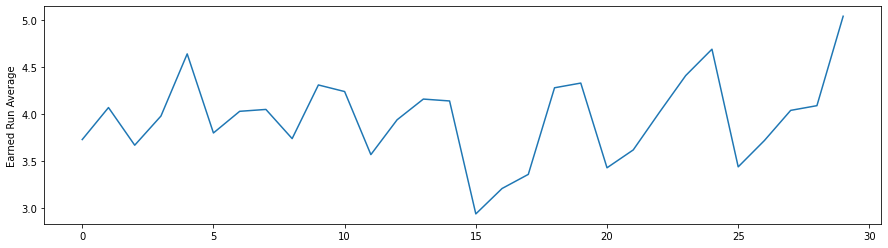

In [37]:
df.ERA.plot(figsize=(15,4))
plt.ylabel('Earned Run Average')

ERA of pitcher should be very low always

Text(0, 0.5, 'Earned Run ')

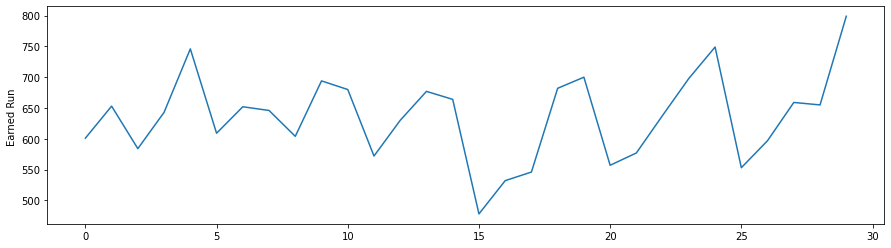

In [38]:
df.ER.plot(figsize=(15,4))
plt.ylabel('Earned Run ')

we can see ERA and ER are almost same

Text(0, 0.5, 'Earned Run ')

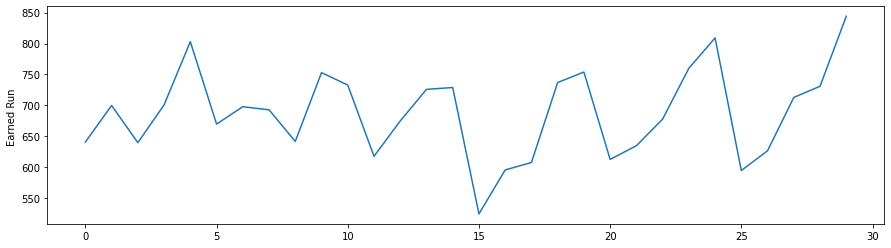

In [39]:
df.RA.plot(figsize=(15,4))
plt.ylabel('Earned Run ')

RA and ER and ERA are all same.so we can drop any one column

In [40]:
df_cat = df[['SB','CG','SHO','SV','E']]

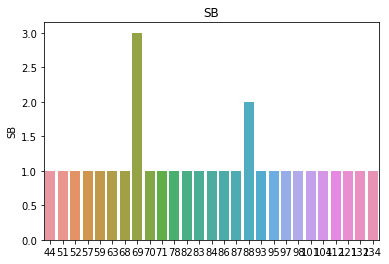

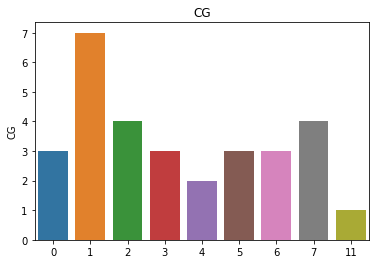

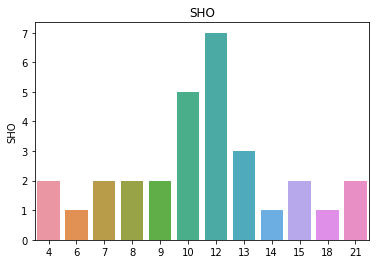

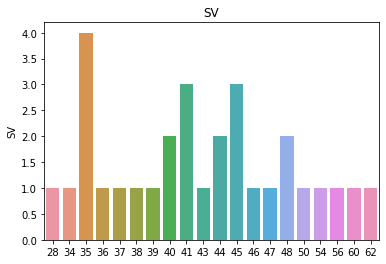

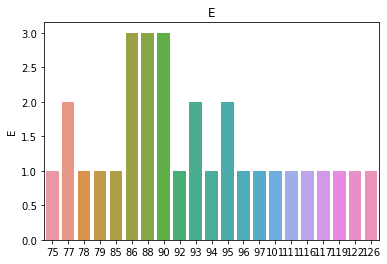

In [41]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

other scores counts

<AxesSubplot:xlabel='R', ylabel='W'>

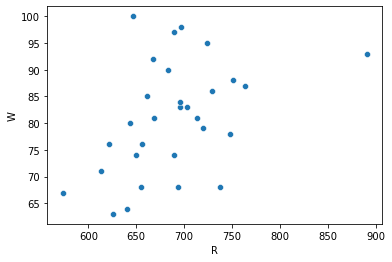

In [42]:
sns.scatterplot(x="R",y="W",data=df)

when runs increases wins also increases

<AxesSubplot:xlabel='ERA', ylabel='W'>

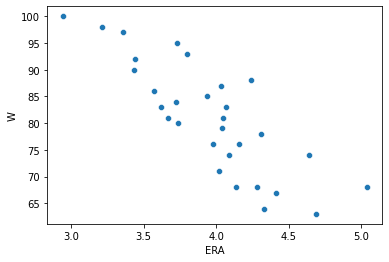

In [43]:
sns.scatterplot(x="ERA",y="W",data=df)

when ERA increases Runs increases

<AxesSubplot:xlabel='BB', ylabel='W'>

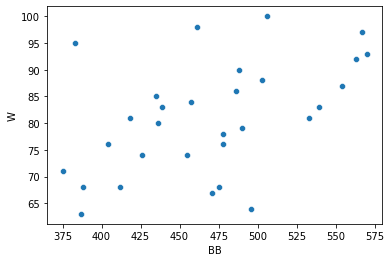

In [44]:
sns.scatterplot(x="BB",y="W",data=df)

Base on balls wins increases because the pitcher loses control this time that become favour for batter

<AxesSubplot:xlabel='SO', ylabel='W'>

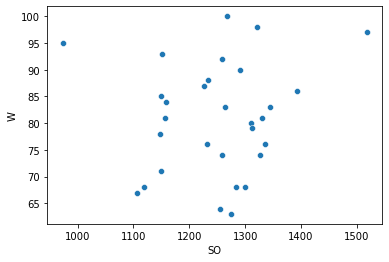

In [45]:
sns.scatterplot(x="SO",y="W",data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

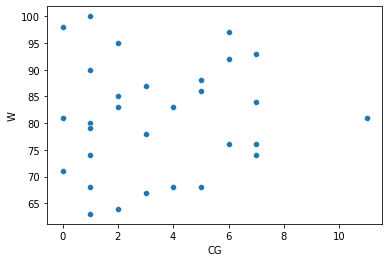

In [46]:
sns.scatterplot(x="CG",y="W",data=df)

if CG increase Wins increase and the player should be carefull about strike outzone

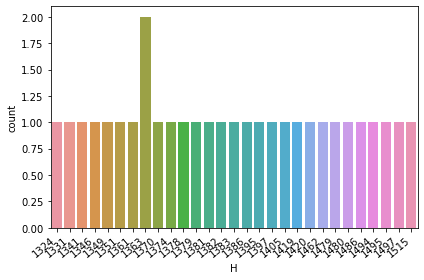

In [47]:
ax = sns.countplot(x="H", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


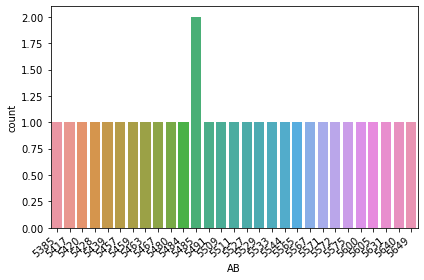

In [48]:
ax = sns.countplot(x="AB", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

DATA PREPROCESSING:

In [49]:
v=df[list(df.columns)[0]] 
df=df.drop(['W'],axis=1) 
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [50]:
df.shape

(30, 16)

In [51]:
df.insert(16,'W',v) 
df


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [52]:
df.shape

(30, 17)

In [53]:
#find correlation co.efficient of all variables in table
df.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


there is collinearity between ERA and RA.there is multicollinearity.these both are in same correlation with the target column

<AxesSubplot:>

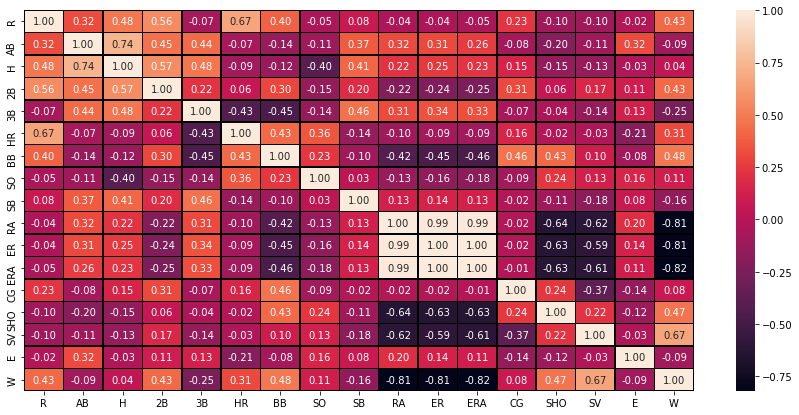

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

there is multicollinearity bewteen RA ,ERA and ER. so we can drop any one column.R,SV and 2B are in most positive correlation with target and AB and E are most negatively correlated with the target.

In [55]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


there is not much diff between 75% and max so there could be less outliers.and mean and std dev are not so close to each other also as we observed

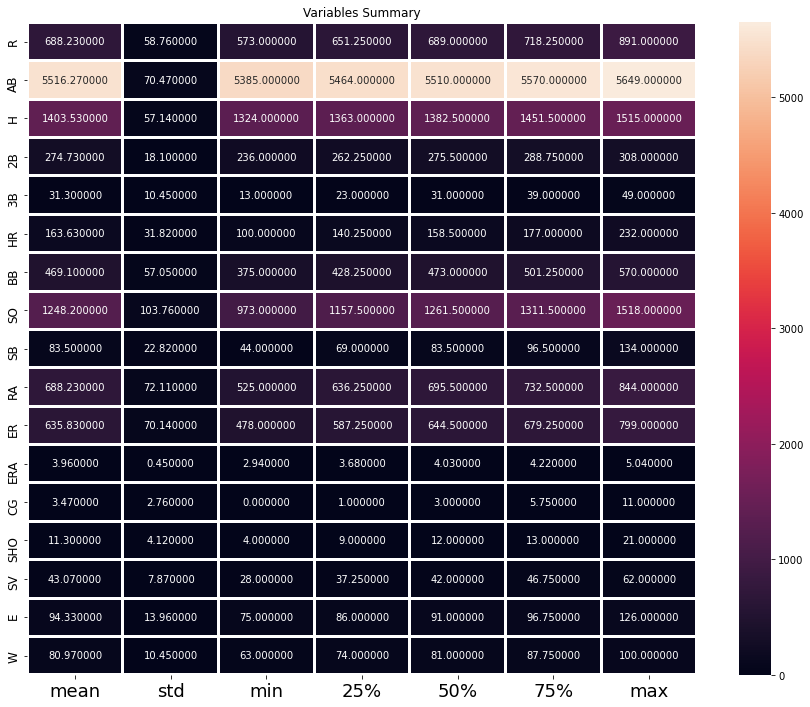

In [56]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

the H column and R column has most skewness

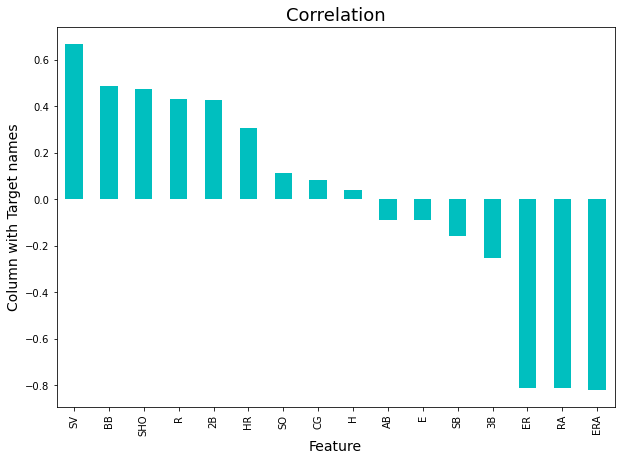

In [57]:
plt.figure(figsize=(10,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

these shows columns which are positively and negatively correlated with the target column

In [58]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
df.shape


(30, 17)

In [60]:
df.shape[1]


17

In [61]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,R,3253.807721
1,AB,5181.779465
2,H,4817.334228
3,2B,1157.105781
4,3B,32.435486
5,HR,309.301103
6,BB,302.099558
7,SO,400.292880
8,SB,28.665516
9,RA,18170.014649


since establishment year has high VIF we can drop this column

In [62]:
#drop column not needed

df=df.drop(['RA'],axis=1)
df

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,694,4.31,3,10,40,97,78


In [63]:
calc_vif(df)

,Variables,VIF FACTOR
0,R,3253.728590
1,AB,5127.811589
2,H,4629.637323
3,2B,1070.812288
4,3B,30.945978
5,HR,263.484862
6,BB,270.818970
7,SO,333.991281
8,SB,27.003456
9,ER,24376.008967


all columns are having correct VIF range now.

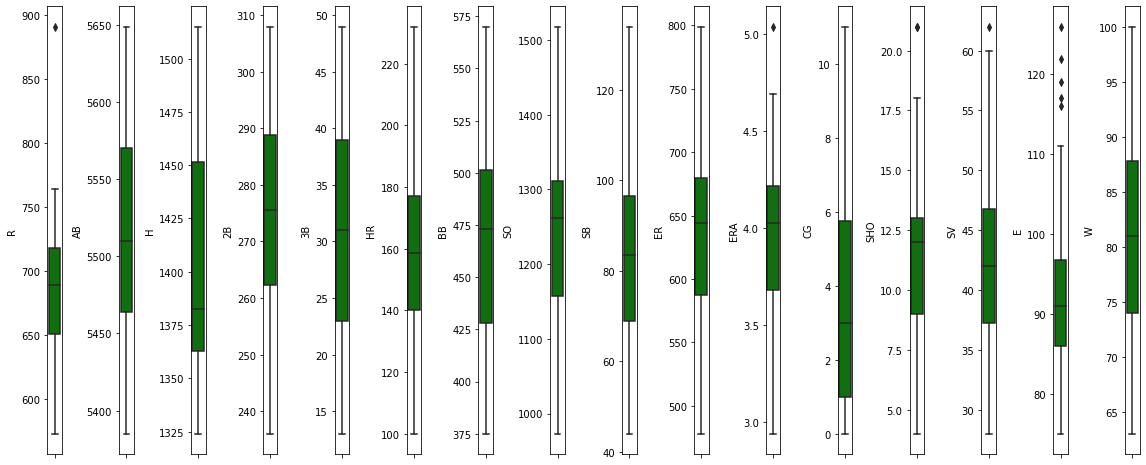

In [64]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

the column error has outliers

In [65]:
#ckeck skewness
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

#checking Z-score to remove outliers

In [66]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(30, 16)

In [67]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [68]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 16)
(29, 16)


some outliers got removed

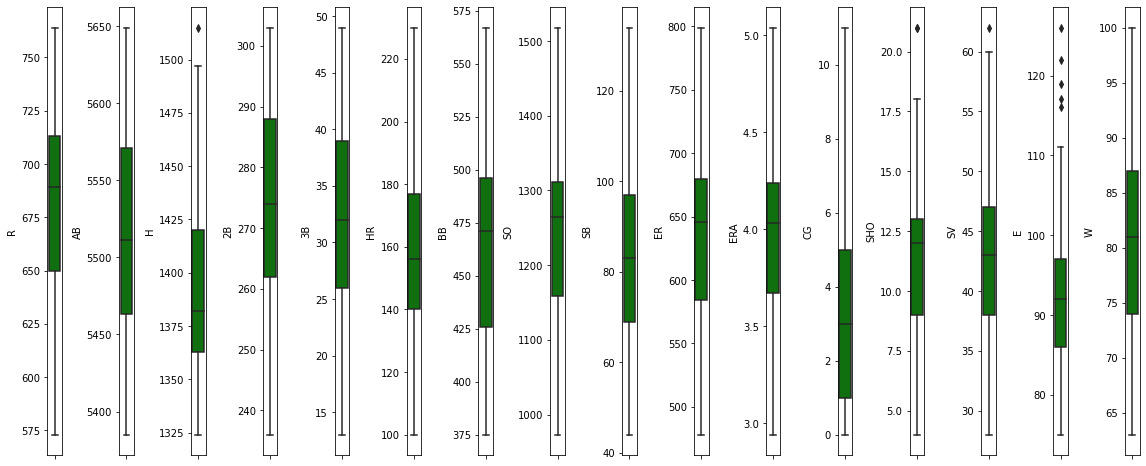

In [69]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [70]:
#finds data loss
loss_percent=(39-29)/(39*100)
print(loss_percent)

0.002564102564102564


data loss percentage is very low.data is cleaned also

In [71]:
df_new


,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,746,4.64,7,12,35,86,74
6,764,5567,1397,272,19,212,554,1227,63,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,694,4.31,3,10,40,97,78
10,751,5511,1419,279,32,172,503,1233,101,680,4.24,5,9,45,119,88


In [72]:
df_new.shape

(29, 16)

In [73]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

PREDICTION PHASE

In [74]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -5.08052224e-01, -5.09292146e-01, -3.07098204e-01,
        -7.87002186e-01,  1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         2.35800488e-01,  2.41440214e-01, -3.07098204e-01,
         2.36736538e-01,  3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -7.52213881e-01, -6.42097599e-01,  2.01131531e+00,
        -2.52844176e-01, -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342

In [75]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.76269627, 0.        , 0.        , 0.94306171, 0.83055597,
        0.37845433, 0.04858078, 0.        , 0.75316743, 0.38755651,
        0.37917067, 0.3808006 , 0.30735723, 0.87953892, 0.41348317],
       [0.6054643 , 0.        , 0.        , 0.54664436, 0.87977593,
        0.51619636, 0.36894124, 0.49499186, 0.39079849, 0.54963105,
        0.54117529, 0.3808006 , 0.55375063, 0.61322186, 0.36116914],
       [0.46072024, 0.        , 0.        , 1.        , 0.49111863,
        0.39536189, 0.84374811, 0.30231579, 0.57576535, 0.33435729,
        0.35051186, 1.        , 0.43591836, 0.40026187, 0.14781417],
       [0.22471302, 0.        , 0.        , 0.29657883, 0.43521083,
        0.35271091, 0.17258737, 0.43427304, 0.36534072, 0.51853669,
        0.49835565, 0.8005316 , 0.3731705 , 0.3661082 , 0.68491843],
       [0.56729207, 0.        , 0.        , 0.74478689, 1.        ,
        0.47703203, 0.45481432, 0.48571836, 0.54333307, 0.8372511 ,
        0.81136213, 0.8005316 , 0.55375063, 

Linear Regression

In [76]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [77]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:97.15428000109331
At random state 0,the testing accuracy is:53.293516526152


At random state 1,the training accuracy is:95.26227833125812
At random state 1,the testing accuracy is:82.43570654529351


At random state 2,the training accuracy is:94.7907809823155
At random state 2,the testing accuracy is:25.182987474964246


At random state 3,the training accuracy is:93.93861685187701
At random state 3,the testing accuracy is:90.64632799141216


At random state 4,the training accuracy is:95.40943881379529
At random state 4,the testing accuracy is:79.0728412518672


At random state 5,the training accuracy is:96.10213340630568
At random state 5,the testing accuracy is:55.68703903121417


At random state 6,the training accuracy is:93.1915146149272
At random state 6,the testing accuracy is:92.35920622093576


At random state 7,the training accuracy is:95.50792336863665
At random state 7,the testing accuracy is:66.24537739096978


At random state 8,th

In [78]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 93.71321619535324


In [79]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is -2540.8656798538386 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 3 the cv score is 33.46870732975869 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 4 the cv score is 45.42320472308673 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 5 the cv score is 45.798725021333894 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 6 the cv score is 41.80693523544157 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 7 the cv score is 31.965802777643276 and accuracy score for Training is 93.9841423285398 and accuracy score for Testing is 93.71321619535324


At cross fold 8 the cv score is 41.60469378110726 and accura

parameter tuning

In [80]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': True}


In [81]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 93.71321619535324
score of model is: 93.98414232853979


In [82]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 45.798725021333766


model performs well

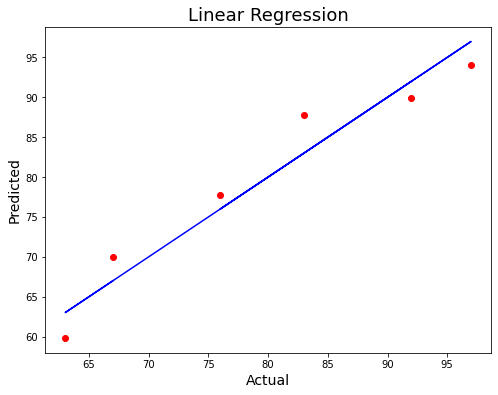

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [84]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 2.949846812643281
mean squared error 9.590837959755556
Root mean squared error 3.096907806143986
r2_score is 93.71321619535324


Lasso regression

parameter tuning

In [85]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [86]:
ls=Lasso(alpha=1,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 28.55433761673567


In [87]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567
At cv :- 9
cv_score is: -7.297421779371064
accuracy score---r2_score is 28.55433761673567


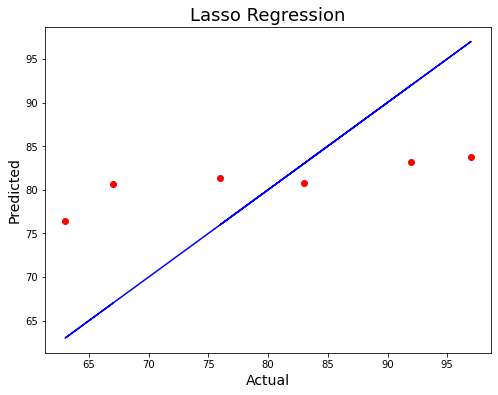

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

thus the Lasso regression performs well here.all data points are near to best fit line

In [89]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 9.45574883703688
mean squared error 108.99432716913547
Root mean squared error 10.440034826049933
r2_score is 28.55433761673567


RandomForestRegressor

parameter tuning

In [90]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'max_features':["auto","sqrt","log2"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': False, 'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [91]:
rf=RandomForestRegressor(criterion="mae",max_features="log2",bootstrap= True,min_samples_leaf= 2, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 93.71321619535324
score of model is: 77.53209307386221


In [92]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: -21.912909745426855


In [93]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 5.875
mean squared error 49.32339999999999
Root mean squared error 7.023062010263044
r2_score is 67.66856518572469


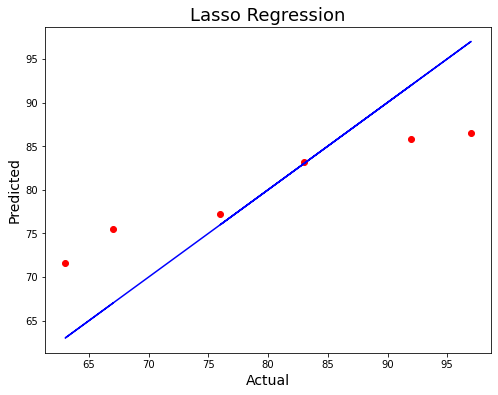

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Ridge Regressor

In [95]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [96]:
rd=Ridge(alpha=0.001,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 93.07732500627506
score of model is: 93.94874538221525


In [97]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 45.87051403346563


In [98]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 3.0084452657828655
mean squared error 10.560925295982608
Root mean squared error 3.2497577288134276
r2_score is 93.07732500627506


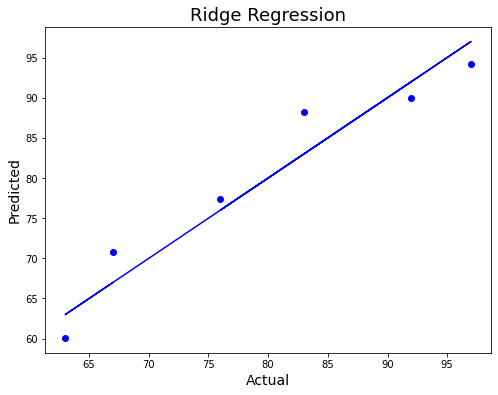

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

thus the Ridge regression performs well here.all data points are near to best fit line

Decison Tree Regressor

In [100]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mse', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.2, 'random_state': 5, 'splitter': 'random'}


In [101]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 1, splitter= 'random')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 50.82316703083273
score of model is: 81.65637348365526


In [102]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: -75.70556952053204


In [103]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 7.013888888888888
mean squared error 75.02199074074073
Root mean squared error 8.661523580799209
r2_score is 50.82316703083273


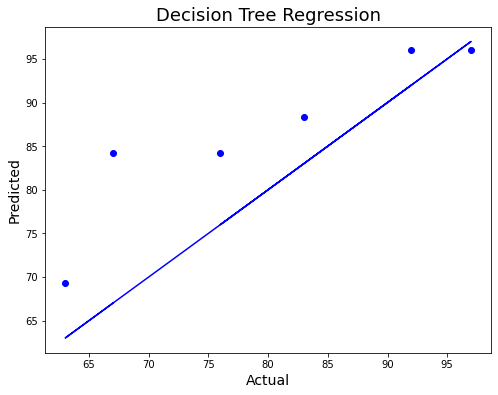

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

thus the Decision Tree regression performs well here.all data points are near to best fit line

GradientBoostingRegressor

In [105]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,5,7,9,11,12],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 1, 'min_weight_fraction_leaf': 0.4, 'n_estimators': 100}


In [106]:

gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=100,learning_rate= 0.05,max_depth= 5, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 93.71321619535324
score of model is: 99.58736875014311


In [107]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: -89.46332318670231


In [108]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 4.968943761934071
mean squared error 33.001093720030575
Root mean squared error 5.744657841858867
r2_score is 78.36781912015476


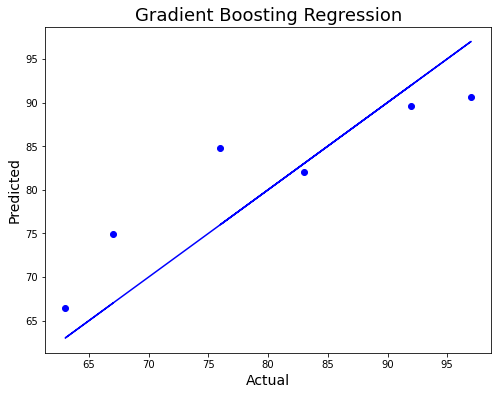

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

Support Vector Regressor

In [110]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.01}


In [111]:
sv=SVR(kernel='poly',gamma='scale',degree= 5, max_iter= -1, shrinking= False, tol= 0.0001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 93.71321619535324
score of model is: 99.98903739045457


In [112]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: -41.221208841963765


In [113]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 10.263889718736674
mean squared error 160.5835258775483
Root mean squared error 12.672155533986643
r2_score is -5.262325775523302


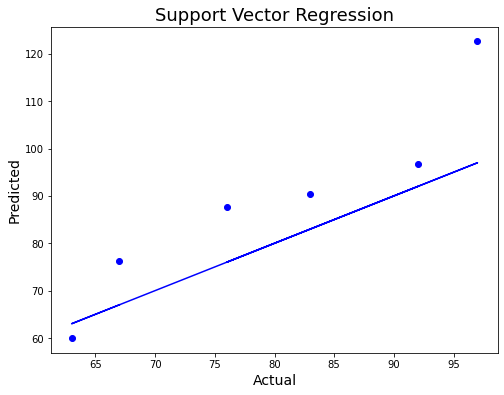

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

thus the Support Vector Regression performs well here.all data points are near to best fit line

#Elastic Net Regression(combination of L1 & L2)

In [115]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [116]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 93.71321619535324
score of model is: 93.94015819530784


In [117]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 45.92766653729433


In [118]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 3.014795585124611
mean squared error 10.694859839363557
Root mean squared error 3.270299655897538
r2_score is 92.98953105941209


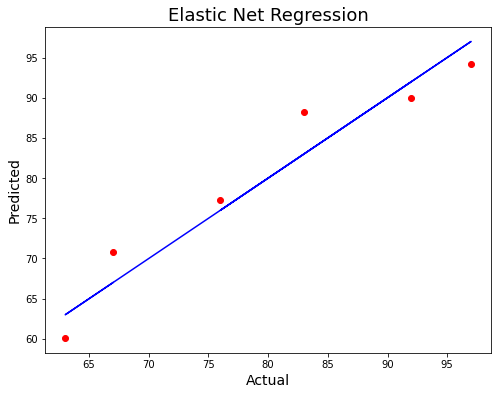

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

conclusion 
output

In [120]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ls.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,67,80.610518
1,63,76.457069
2,97,83.696341
3,76,81.372913
4,83,80.774221
5,92,83.235444


In [129]:
import pickle
filename='Baseball.pkl'
pickle.dump(rf,open(filename,'wb'))


In [130]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [131]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[93.71321619535324,
 28.55433761673567,
 93.71321619535324,
 93.07732500627506,
 50.82316703083273,
 93.71321619535324,
 93.71321619535324,
 93.71321619535324]

In [132]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [133]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()


Nos,Model Names,Scores
1,Linear Regression,93.713216
2,Lasso regression,28.554338
3,RandomForestRegressor,93.713216
4,Ridge Regressor,93.077325
5,Decison Tree Regressor,50.823167
6,GradientBoostingRegressor,93.713216
7,Support Vector Regressor,93.713216
8,ElasticNet Regression,93.713216


CONCLUSION

From the above models,Linear Regression,RandomForestRegressor,GradientBoostingRegressor,Support Vector Regressor,ElasticNet Regression performs the best.so we can save any one of the best model from this.we are choosing here RandomForestRegressor model because it has fine tuning parameters which traverse to depth and it can yield good result in any scenario.

The predicted and actual result are almost same. and we can observe from the above dataset the ERA and RA plays major role in winning the game.The R ,SO,BB,ER these scores also impact mostly the target result